In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
districts = gpd.read_file(r'C:\Users\ehdwn\OneDrive\바탕 화면\python\geopandas\Introduction to GeoPandas-20230704T201636Z-001\Introduction to GeoPandas\Shapefiles\districts.shp')
#shapefile에서 geodataframe으로 변환했음

In [8]:
districts
#gpd = polygon and multipolygon을 가지는 geometry라는 컬럼을 가지게 된다

,district,geometry
0,"Newry, Mourne and Down","POLYGON ((-5.82139 54.49408, -5.82128 54.49399..."
1,Mid Ulster,"POLYGON ((-6.53263 54.94913, -6.53253 54.94901..."
2,Mid and East Antrim,"POLYGON ((-5.96917 55.05284, -5.96909 55.05284..."
3,Lisburn and Castlereagh,"POLYGON ((-6.08760 54.62414, -6.08699 54.62394..."
4,"Armagh City, Banbridge and Craigavon","POLYGON ((-6.27820 54.54965, -6.27819 54.54960..."
5,Antrim and Newtownabbey,"POLYGON ((-6.16426 54.81062, -6.16405 54.81063..."
6,Ards and North Down,"MULTIPOLYGON (((-5.74192 54.67759, -5.74190 54..."
7,Fermanagh and Omagh,"POLYGON ((-6.99814 54.78009, -6.99806 54.78010..."
8,Derry City and Strabane,"POLYGON ((-7.25762 55.06648, -7.25759 55.06648..."
9,Causeway Coast and Glens,"MULTIPOLYGON (((-6.48405 55.25194, -6.48401 55..."


In [6]:
type(districts)
#not a shapefile, it is geodataframe now

geopandas.geodataframe.GeoDataFrame

<Axes: >

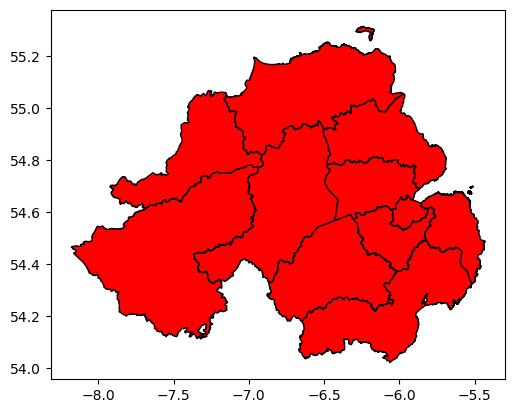

In [13]:
districts.plot(color = 'red', edgecolor = 'black')

<Axes: >

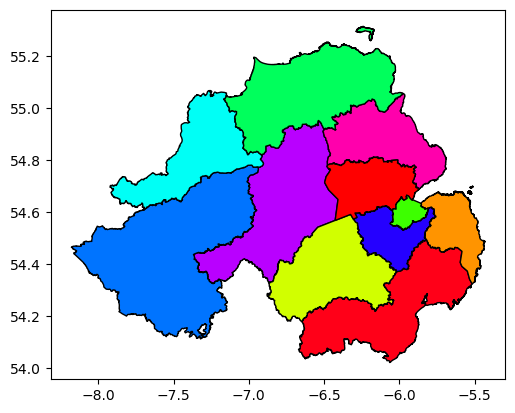

In [16]:
districts.plot(cmap = 'hsv', edgecolor = 'black', column = 'district')
#each districts has a unique color

In [17]:
area_of_interest =  gpd.read_file(r'C:\Users\ehdwn\OneDrive\바탕 화면\python\geopandas\Introduction to GeoPandas-20230704T201636Z-001\Introduction to GeoPandas\Shapefiles\area_of_interest.shp')

<Axes: >

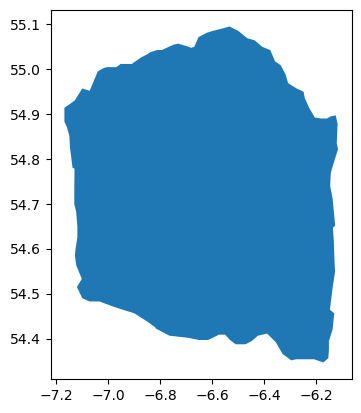

In [19]:
area_of_interest.plot()

<Axes: >

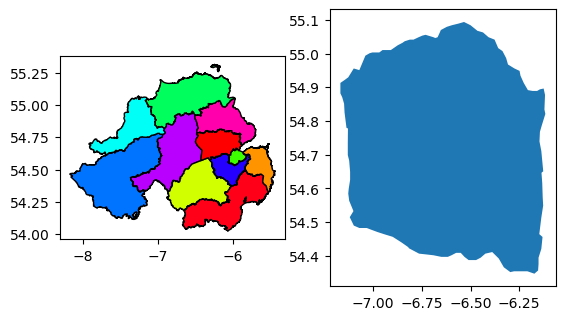

In [26]:
#fig, (ax1, ax2) = plt.subplots(ncols=2)
#districts.plot(ax = ax1, cmap='hsv', edgecolor='black', column='distric')
#area_of_interest.plot(ax = ax2)


<Axes: >

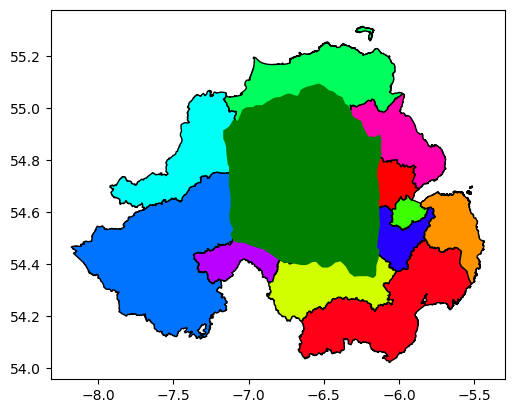

In [30]:
fig, (ax) = plt.subplots()
districts.plot(ax = ax, cmap='hsv', edgecolor='black', column='district')
area_of_interest.plot(ax = ax, color='green')
#I wanna see how many districts got covered by area_of_interest

<Axes: >

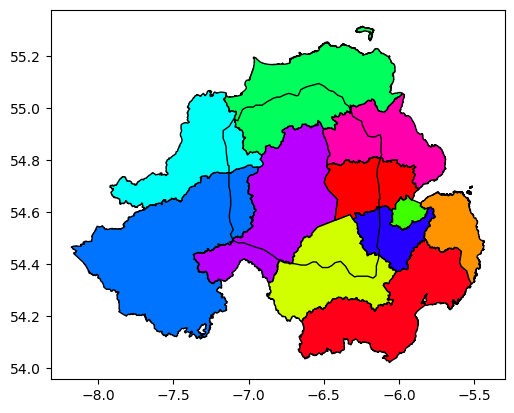

In [32]:
#fig, (ax) = plt.subplots()
#districts.plot(ax = ax, cmap='hsv', edgecolor='black', column='district')
#area_of_interest.plot(ax = ax, color='none', edgecolor='black')
#eight districts are covered

In [34]:
atm =  gpd.read_file(r'C:\Users\ehdwn\OneDrive\바탕 화면\python\geopandas\Introduction to GeoPandas-20230704T201636Z-001\Introduction to GeoPandas\Shapefiles\atms.shp')

<Axes: >

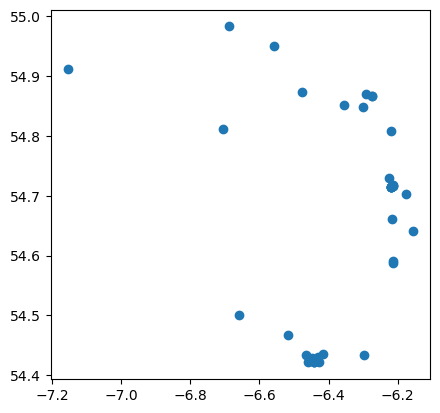

In [38]:
atm.plot()
#adding these locations on the map above

<Axes: >

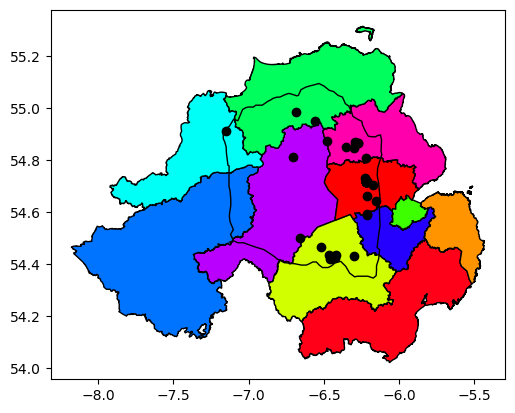

In [40]:
#fig, (ax) = plt.subplots()
#districts.plot(ax = ax, cmap='hsv', edgecolor='black', column='district')
#area_of_interest.plot(ax = ax, color='none', edgecolor='black')
#atm.plot(ax=ax, color='black')


In [41]:
districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

**Geographic to Projected coordinate systems**

<Axes: >

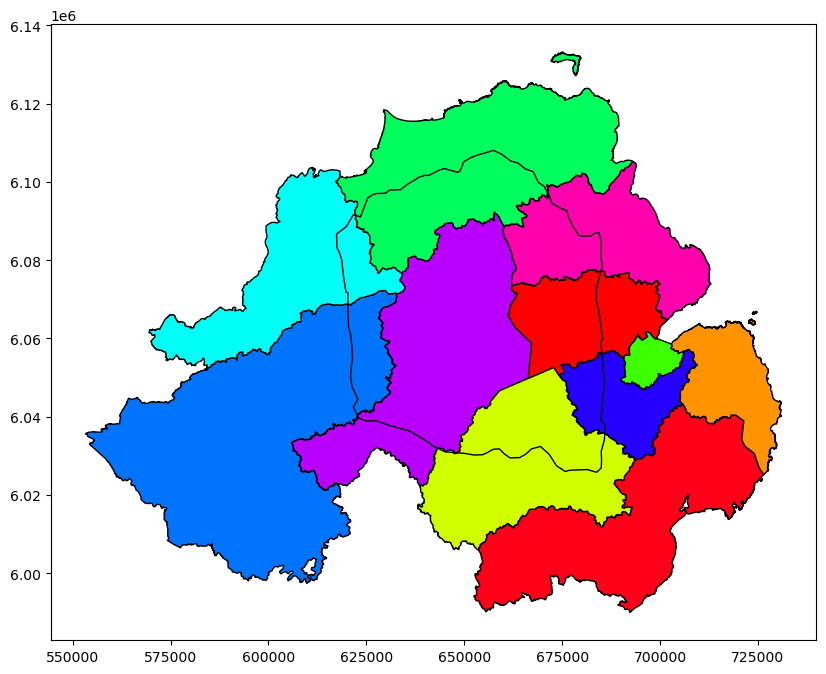

In [44]:
fig, ax = plt.subplots(figsize=(10,8))
districts = districts.to_crs(epsg = 32629)
districts.plot(ax = ax, cmap='hsv', edgecolor='black', column='district')
area_of_interest = area_of_interest.to_crs(epsg = 32629)
area_of_interest.plot(ax = ax, color='none', edgecolor='black')
#x,y축을 보면 숫자가 변한것을 알 수 있음. 기존 지구의 각도(좌표)에서 미터 단위로 변환 된 것임.

,district,Id,geometry
0,Mid Ulster,0,"POLYGON ((658023.630 6091903.404, 658030.243 6..."
1,Mid and East Antrim,0,"POLYGON ((684908.771 6077240.941, 684903.541 6..."
2,Lisburn and Castlereagh,0,"POLYGON ((685894.090 6035737.164, 685891.166 6..."
3,"Armagh City, Banbridge and Craigavon",0,"MULTIPOLYGON (((676033.306 6048080.158, 676033..."
4,Antrim and Newtownabbey,0,"POLYGON ((682239.947 6077405.626, 682246.748 6..."
5,Fermanagh and Omagh,0,"POLYGON ((628751.931 6072158.997, 628755.668 6..."
6,Derry City and Strabane,0,"POLYGON ((622292.384 6091383.856, 622290.858 6..."
7,Causeway Coast and Glens,0,"POLYGON ((671301.064 6097251.878, 671300.557 6..."


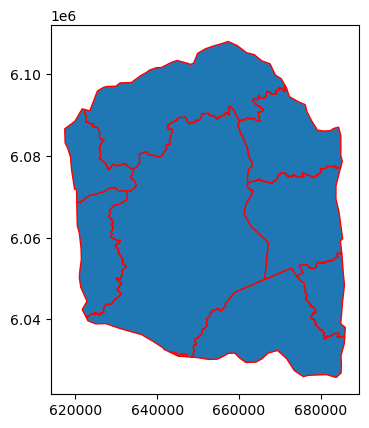

In [49]:
districts_in_aoi = gpd.overlay(districts, area_of_interest, how = 'intersection')
districts_in_aoi.plot(edgecolor='red')
districts_in_aoi
#as a result, i got eight districts as same as i have already mentioned above

Calculate areas by simply coding 'area'

In [54]:
districts_in_aoi['area'] = districts_in_aoi.area/10**6 #convert sqrd m(utm, 좌표계) to sqrd km. 좌표계에서 평면거리로
districts_in_aoi

,district,Id,geometry,area
0,Mid Ulster,0,"POLYGON ((658023.630 6091903.404, 658030.243 6...",1574.420076
1,Mid and East Antrim,0,"POLYGON ((684908.771 6077240.941, 684903.541 6...",373.691057
2,Lisburn and Castlereagh,0,"POLYGON ((685894.090 6035737.164, 685891.166 6...",151.737874
3,"Armagh City, Banbridge and Craigavon",0,"MULTIPOLYGON (((676033.306 6048080.158, 676033...",553.932816
4,Antrim and Newtownabbey,0,"POLYGON ((682239.947 6077405.626, 682246.748 6...",462.822918
5,Fermanagh and Omagh,0,"POLYGON ((628751.931 6072158.997, 628755.668 6...",262.996444
6,Derry City and Strabane,0,"POLYGON ((622292.384 6091383.856, 622290.858 6...",187.500979
7,Causeway Coast and Glens,0,"POLYGON ((671301.064 6097251.878, 671300.557 6...",747.580677


In [56]:
districts_in_aoi.to_file('districts_within_aoi.shp', driver = "ESRI Shapefile")